In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

kaggle dataset

In [74]:
data=pd.read_csv('/content/Student_performance_data _.csv')



In [75]:
#checking duplicates
data.duplicated().sum()

np.int64(0)

In [76]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Data cleaning

In [78]:
x = data.corr()['GPA'][:30]
print (x)

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


<Axes: title={'center': 'Correlation between features and Class'}>

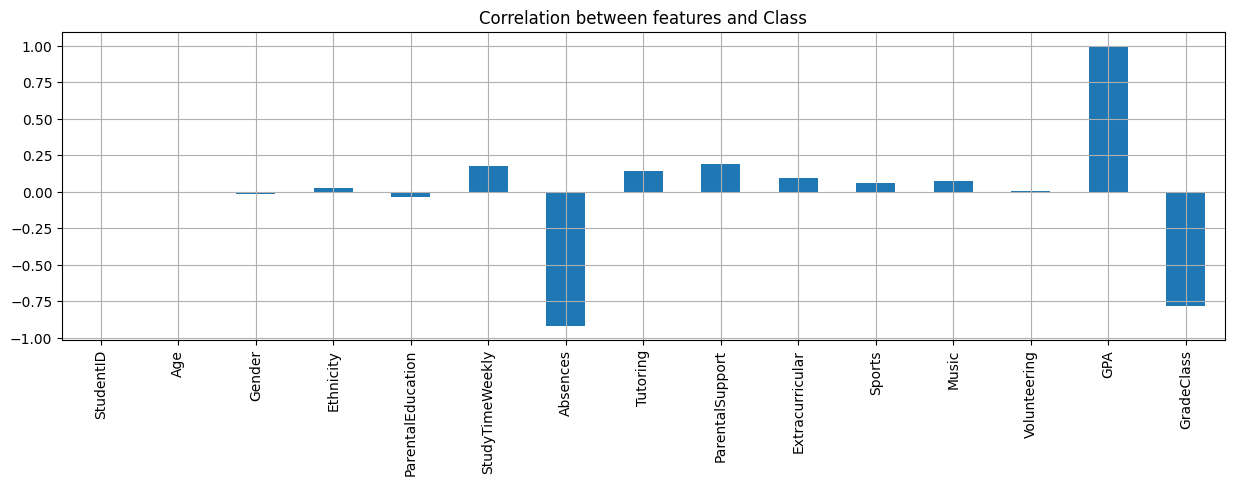

In [79]:
x.plot.bar(figsize=(15, 4), title="Correlation between features and Class", grid=True)

<Axes: >

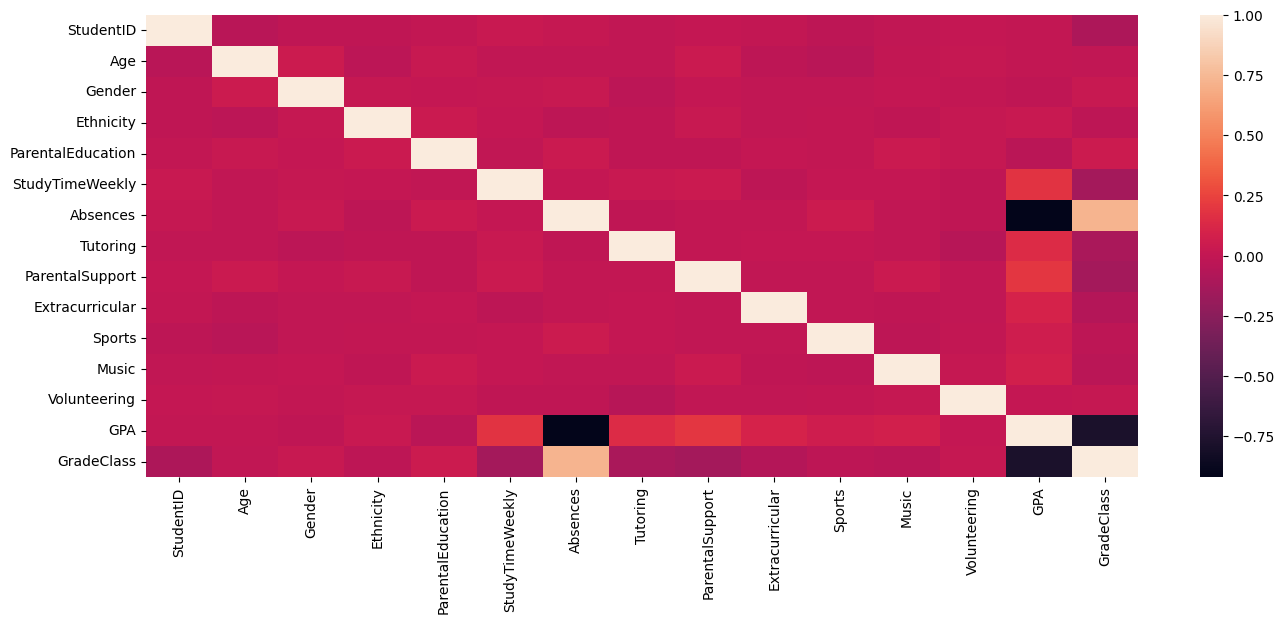

In [80]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr())

model with higher absolute correlation threshold

In [81]:
y = data.corr()['GPA']
new_data = data.copy()
for i in data.columns:
  if abs(y[i]) < 0.1:
    new_data.drop(columns=[i], inplace=True)

new_data.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass
0,19.833723,7,1,2,2.929196,2.0
1,15.408756,0,0,1,3.042915,1.0
2,4.210570,26,0,2,0.112602,4.0
3,10.028829,14,0,3,2.054218,3.0
4,4.672495,17,1,3,1.288061,4.0


<Axes: title={'center': 'Top Correlated Features With GPA'}>

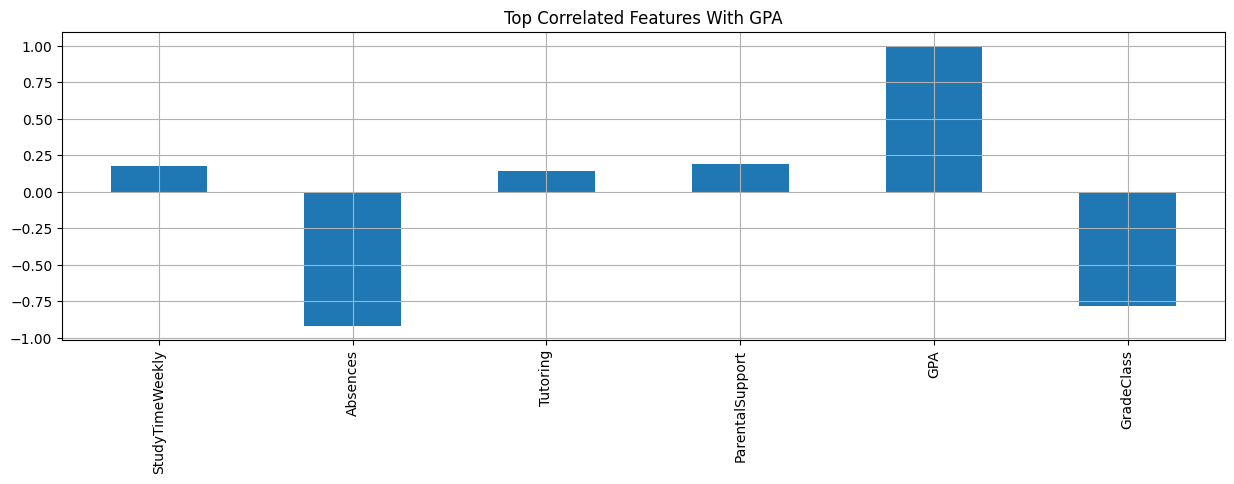

In [82]:
x = new_data.corr()['GPA'][:10]
x.plot.bar(figsize=(15,4), title="Top Correlated Features With GPA", grid=True)

In [83]:
from sklearn.model_selection import train_test_split
x = new_data.drop(['GradeClass', 'GPA'], axis=1)
y = new_data['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)




In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Mean Squared Error: 0.059249754567826 R² Score: 0.9283499603686272


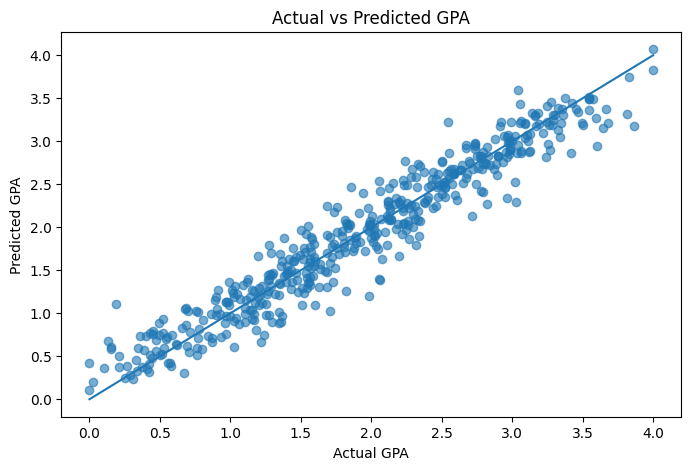

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred), "R² Score:", r2_score(y_test, y_pred))
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()


model with lower absolute correlation threshold

In [86]:
y = data.corr()['GPA']
new_data = data.copy()
for i in data.columns:
  if abs(y[i]) < 0.05:
    new_data.drop(columns=[i], inplace=True)
new_data.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA,GradeClass
0,19.833723,7,1,2,0,0,1,2.929196,2.0
1,15.408756,0,0,1,0,0,0,3.042915,1.0
2,4.210570,26,0,2,0,0,0,0.112602,4.0
3,10.028829,14,0,3,1,0,0,2.054218,3.0
4,4.672495,17,1,3,0,0,0,1.288061,4.0


<Axes: title={'center': 'Top Correlated Features With GPA'}>

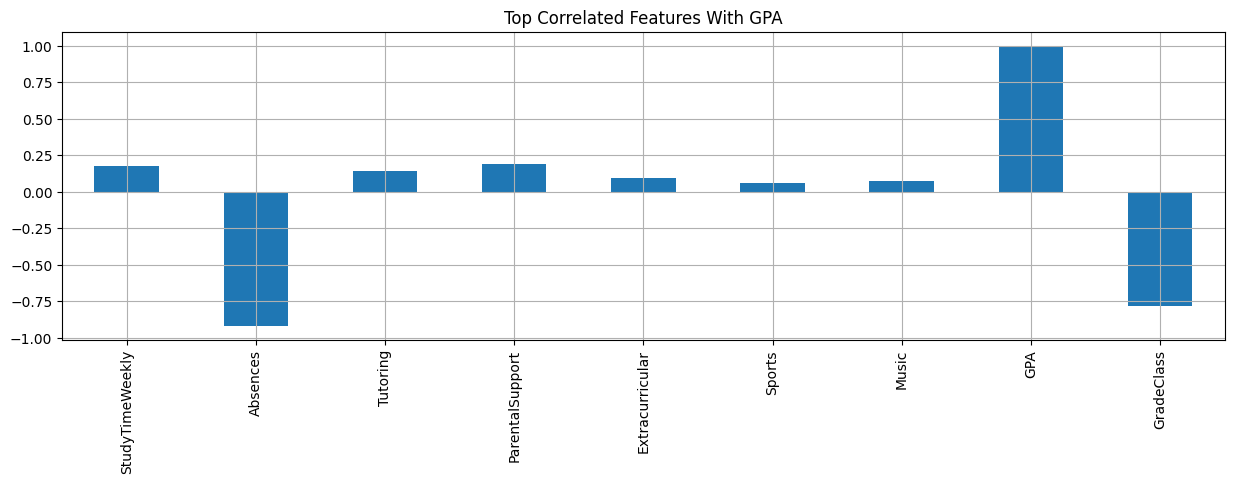

In [87]:
x = new_data.corr()['GPA'][:10]
x.plot.bar(figsize=(15,4), title="Top Correlated Features With GPA",grid=True)

In [88]:
x = new_data.drop(['GradeClass', 'GPA'], axis=1)
y = new_data['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

MSE: 0.03877193854563585 R² Score: 0.9531135453025407


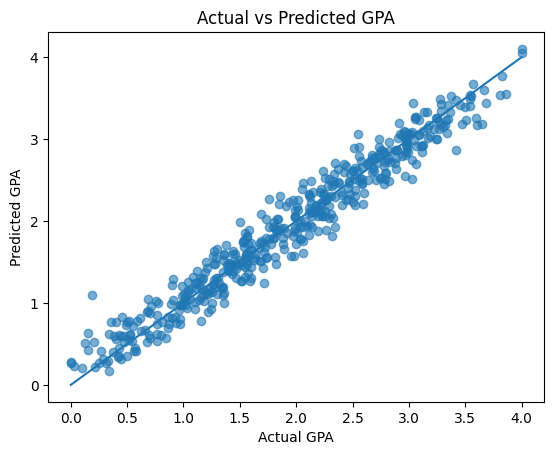

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred), "R² Score:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()


polynomial regression (degree=2) with lower MSE dataset

 MSE: 0.038547216918971075 R²: 0.9533852985540773


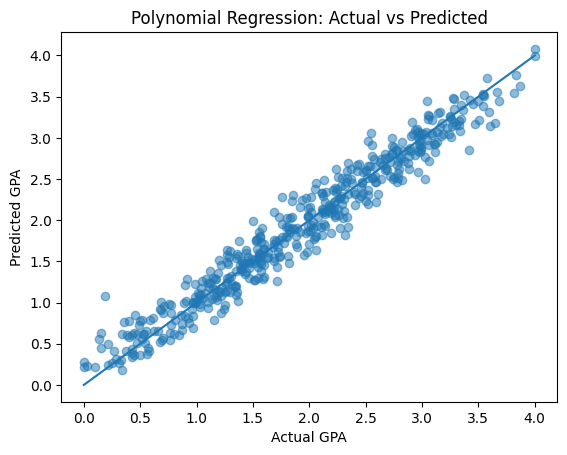

In [91]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
reg = Pipeline([("poly", PolynomialFeatures(degree=2, include_bias=False)),("scaler", StandardScaler()),("linreg", LinearRegression())])
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(" MSE:", mean_squared_error(y_test, y_pred),"R²:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual GPA"); plt.ylabel("Predicted GPA")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()



polynomial regression testing multiple degrees with lower MSE dataset

Best degree: 1
MSE: 0.038771938545635834  R²: 0.9531135453025407


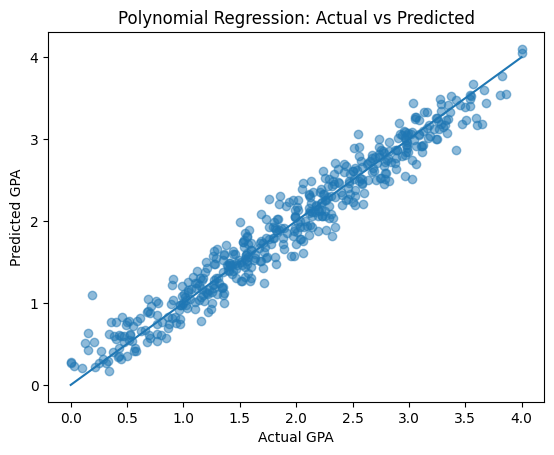

In [92]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([("poly", PolynomialFeatures(include_bias=False)),("scaler", StandardScaler()),("linreg", LinearRegression())])
degrees = {"poly__degree": [1, 2, 3]}
gcv = GridSearchCV(pipe, degrees, cv=3, scoring="r2")
gcv.fit(x_train, y_train)
best_model = gcv.best_estimator_
y_pred_best = best_model.predict(x_test)
print("Best degree:", gcv.best_params_["poly__degree"])
print("MSE:", mean_squared_error(y_test, y_pred_best), " R²:", r2_score(y_test, y_pred_best))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual GPA"); plt.ylabel("Predicted GPA")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()
